### Importing Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Let’s load the data in a data frame and check how data looks like...

In [7]:
df = pd.read_csv("train.csv")
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
#Total number of rows and columns in the data
df.shape

(891, 12)

<ul>
    <li>Dataset comprises of 891 observations </li>
    <li>12 characteristics</li>
</ul>

<h2>It is also a good practice to know the columns and their corresponding data types,along with finding whether they contain null values or not.</h2>

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<ul>
    <li>In above output , column consist the name of the column , Non-null Count means How many non-null values we have in that column , Dtype means What type of value that column consits ( int64 means int value , float64 means float value, object means string value)</li>
    <li>In age column we can see, Out of 891 values we have 714 non null values. It implies that we have 177 Null values. ( 891–714 = 177)</li>
    <li>Same in the Cabin feature Out of 891 values we have only 204 non-null values. it implies that we have 687 Null values. But this is Huge . we have only 23% of values present in data set and 77% values are missing so we can drop this feature while making our model.</li>
    <li>Except age and cabin any features does not have any null values.</li>
</ul>


### Fetch some info about numerical features by .describe()

The describe() function in pandas is very handy in getting various summary statistics.This function returns the count, mean, standard deviation, minimum and maximum values and the quantiles of the data.

In [10]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<ol>
    <li>We will only consider Age and Fare, as they are only numerical and helps in numerical analysis</li>
    <li>Inference of Age:
        <ul>
            <li>Age feature we can see count is as 714 it means for 714 persons we have age value, else are missing. </li>
            <li>Mean as 29.69 , It means The mean age of all the passengers is 29.69 Years.</li>
            <li>As Standard Deviation = 14.5, It means most of the people have age in the range (29.69-14.52) to (29.69+14.52) because in a continuous Random Variable most of the values can be found in the range of (mean-std) to (mean+std). </li>
        </ul>
    </li>
    <li>Inference of Fare:
        <ul>
            <li>Fare feature we can see count is as 891</li>
            <li>Mean as 32.2 , It means The mean fare of all the passengers is 32.2 Years.</li>
            <li>Clearly the SD is larger and amply suggest that this was due to larger variation in the data ranging from 0–512. </li>
            <li>There is notably a large difference between 75th %tile and max value</li>
            <li>Here as you can notice mean value is less than median value of fare column which is represented by 50%(50th percentile) in index column</li>
            <li>Thus, the observations suggests that there are extreme values-Outliers in our data set.</li>
        </ul>
    </li>
</ol>

### Take care of Missing Values

The features ticket and cabin have many missing values and so can’t add much value to our analysis. To handle this we will drop them from the dataframe to preserve the integrity of our dataset.
<br>
To do that we'll use this line of code to drop the features entirely:
        <i>df = df.drop(['ticket','cabin'], axis=1)</i> 
<br>
While this line of code removes the NaN values from every remaining column / feature: <i>df = df.dropna()</i>

In [11]:
df = df.drop(['Ticket','Cabin'], axis=1)
# Remove NaN values
df = df.dropna()

### Get info about balanced or imbalanced data set.

In [12]:
# Replacing 1 as yes and 0 as no. 
df['Survived'] = df['Survived'].map({1:"Yes",0:"No"})
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,No,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,Yes,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,Yes,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,Yes,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,No,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


### Since we have done the basic Analysis now lets go towards visual analysis and check hypothesis

#### Analysis-I

Hypothesis:To Check whether Gender plays role in surviving or not

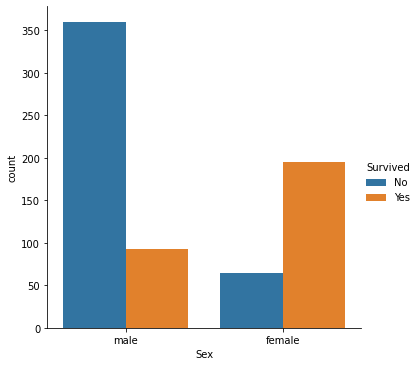

In [13]:
# Countplot
sns.catplot(x ="Sex", hue ="Survived", 
kind ="count", data = df)

Key Inferences:
    <ul>
        <li>Just by observing the graph, it can be approximated that the survival rate of men is around 20% and that of women is around 75%. Therefore, whether a passenger is a male or a female plays an important role in determining if one is going to survive.</li>


    

#### Analysis-II

Hypothesis:To Check whether Passenger class plays role in surviving or not

<AxesSubplot:xlabel='Survived', ylabel='Pclass'>

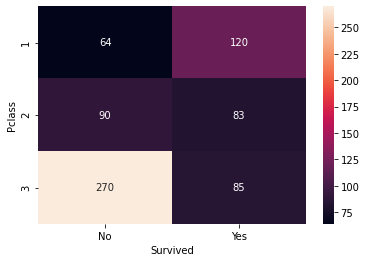

In [14]:
# Group the dataset by Pclass and Survived and then unstack them
group = df.groupby(['Pclass', 'Survived'])
pclass_survived = group.size().unstack()
  
# Heatmap - Color encoded 2D representation of data.
sns.heatmap(pclass_survived, annot = True, fmt ="d")

Key Inference:
<ul>
    <li>Class 1 passengers have a higher survival chance compared to classes 2 and 3. It implies that Pclass contributes a lot to a passenger’s survival rate

#### Analysis-III

Hypothesis:To Check whether Age range plays role in surviving or not

<AxesSubplot:xlabel='Sex', ylabel='Age'>

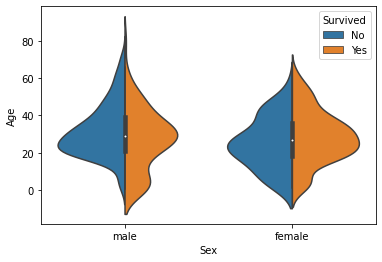

In [15]:
# Violinplot Displays distribution of data 
# across all levels of a category.
sns.violinplot(x ="Sex", y ="Age", hue ="Survived", data = df, split = True)

Key Inference: This graph gives a summary of the age range of men, women and children who were saved. The survival rate is
<ul>
    <li>Good for children.</li>
    <li>High for women in the age range 20-50.</li>
    <li>Less for men as the age increases.</li>
</ul>




#### Analysis-IV

Hypothesis:Passenger class wise analysis

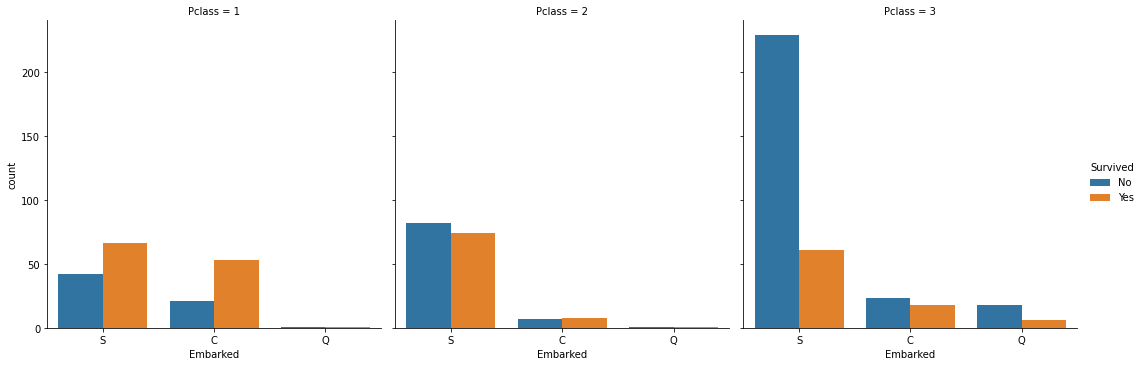

In [16]:
# Countplot
sns.catplot(x ='Embarked', hue ='Survived', kind ='count', col ='Pclass', data = df)

Key Inferences:
<ul>
    <li>Majority of the passengers boarded from S. So, the missing values can be filled with S.</li>
    <li>Majority of class 3 passengers boarded from Q.</li>
    <li>S looks lucky for class 1 and 2 passengers compared to class 3.</li>
</ul>

